In [190]:
import pandas as pd
import numpy as np

In [191]:
data = pd.read_csv('data.csv')
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [192]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [193]:
data.drop('Unnamed: 32', axis = 1, inplace = True)
data.drop('id', axis = 1, inplace = True)

In [194]:
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [195]:
y = data['diagnosis']
X = data.drop('diagnosis', axis = 1)
feature_names = X.columns

In [196]:
y.replace('M', 1, inplace = True)
y.replace('B', 0, inplace = True)

C:\Users\Miona\AppData\Local\Temp\ipykernel_11676\2257045909.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y.replace('B', 0, inplace = True)


In [197]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify = y, random_state = 42)

In [198]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [199]:
from sklearn.metrics import accuracy_score, confusion_matrix
from matplotlib import pyplot as plt

In [200]:
from sklearn.model_selection import GridSearchCV

In [201]:
params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [2, 4, 6, 8]
}

estimator = GridSearchCV(DecisionTreeClassifier(), param_grid = params, cv = 3)

In [202]:
estimator.fit(X_train, y_train)

,estimator,DecisionTreeClassifier()
,param_grid,"{'criterion': ['gini', 'entropy'], 'max_depth': [2, 4, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'entropy'


In [203]:
estimator.best_score_

np.float64(0.9225352112676056)

In [204]:
pd.DataFrame(confusion_matrix(y_test, estimator.predict(X_test)), index = ['B', 'M'], columns = ['B', 'M'])

,B,M
B,87,3
M,7,46


In [205]:
pd.DataFrame(confusion_matrix(y_train, estimator.predict(X_train)), index = ['B', 'M'], columns = ['B', 'M'])

,B,M
B,267,0
M,0,159


In [206]:
from sklearn.tree import plot_tree

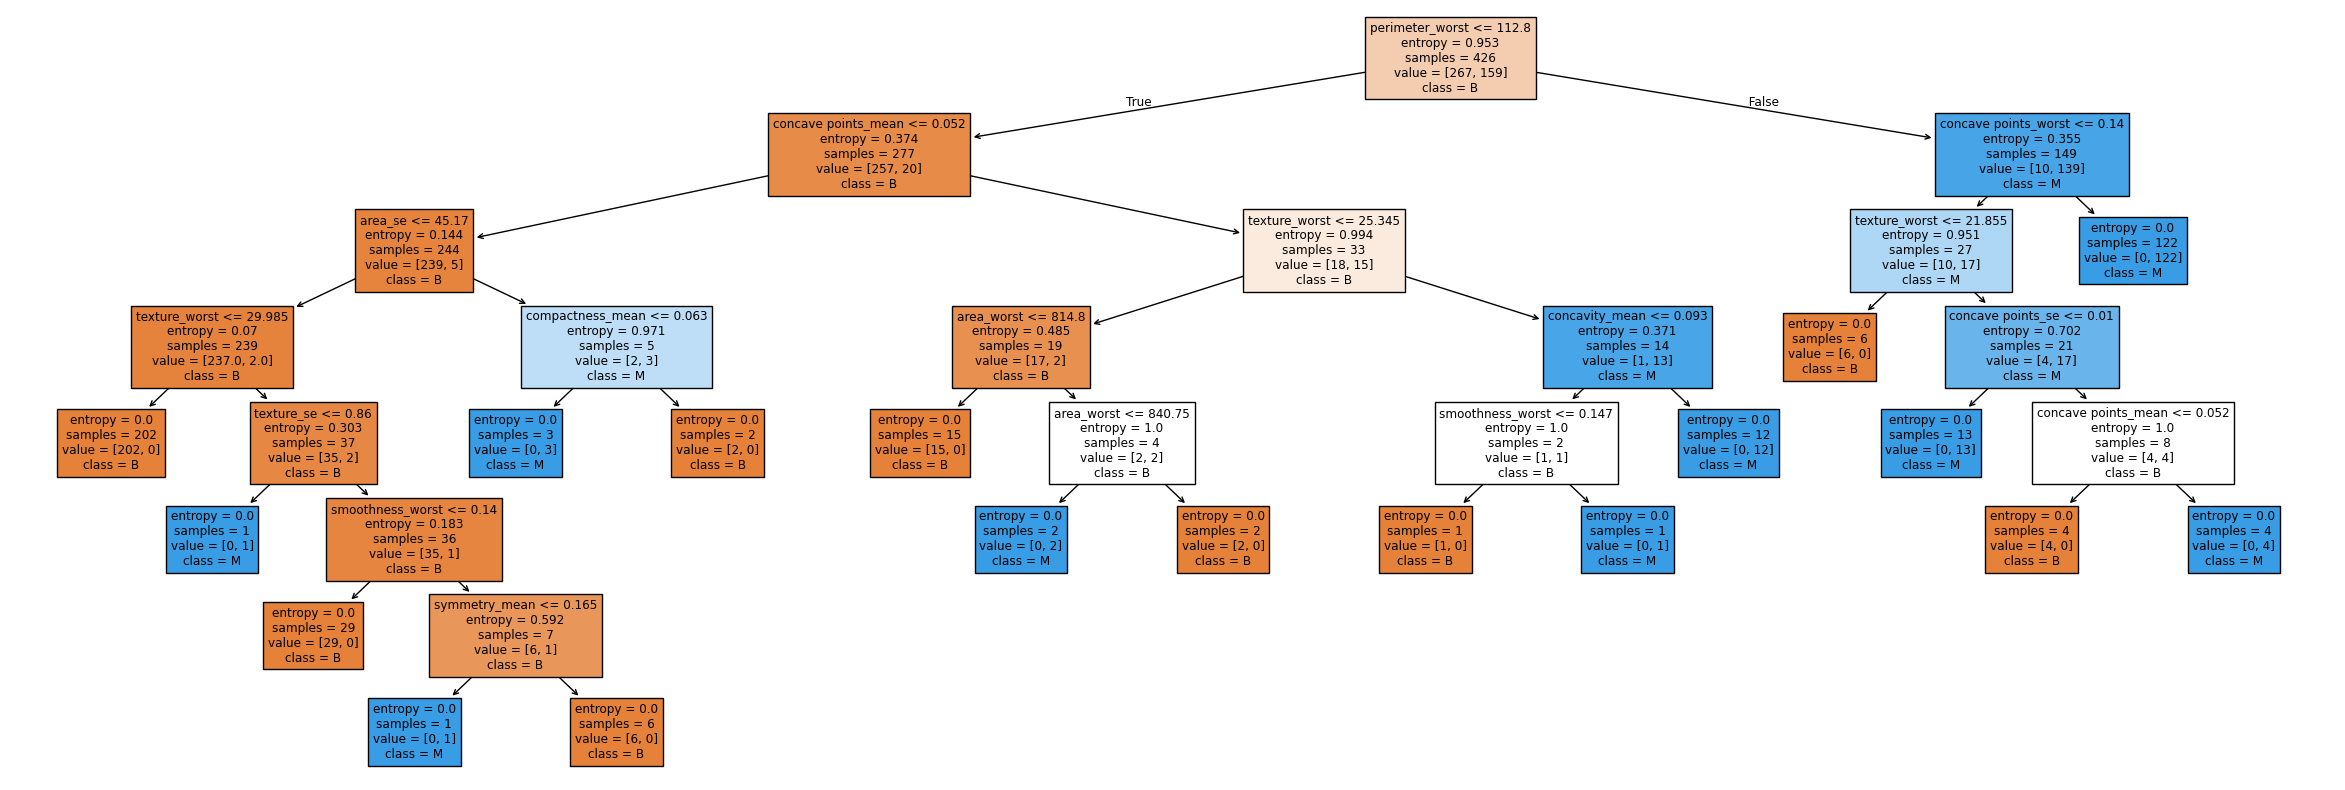

In [207]:
plt.figure(figsize = (30, 10))
_ = plot_tree(estimator.best_estimator_, class_names = ['B', 'M'],  feature_names = X.columns, filled = True)

In [208]:
from termcolor import colored
from sklearn.metrics import classification_report

def report(model, X, y, text = "training"):
    y_pred = model.predict(X)

    print(colored(f'Classification report for model {type(model).__name__} on {text} data', "green"))
    print(classification_report(y, y_pred))
    
    print(colored(f'Confusion matrix for model {type(model).__name__} on {text} data', "green"))
    print(pd.DataFrame(confusion_matrix(y, y_pred), columns = ['B', 'M'], index = ['B', 'M']))

    print('-'*100)

def plot_decision_tree(model, feature_names):
    plt.figure(figsize = (20, 20))
    plot_tree(model, class_names = ['B', 'M'], feature_names = feature_names, filled = True)
    plt.title(f'decision tree of depth {model.get_depth()}, with {model.get_n_leaves()} nodes')

    plt.show()

    print(colored(f'Parametars of model {type(model).__name__}:', "green"))
    for v, k in model.get_params().items():
        print(v, colored(k, 'blue'))
    
    print('-'*100)

In [209]:
from sklearn.ensemble import RandomForestClassifier

In [210]:
rfc = RandomForestClassifier(n_estimators = 2)
rfc.fit(X_train, y_train)

,n_estimators,2
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Classification report for model RandomForestClassifier on testing data
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        90
           1       1.00      0.79      0.88        53

    accuracy                           0.92       143
   macro avg       0.95      0.90      0.91       143
weighted avg       0.93      0.92      0.92       143

Confusion matrix for model RandomForestClassifier on testing data
    B   M
B  90   0
M  11  42
----------------------------------------------------------------------------------------------------


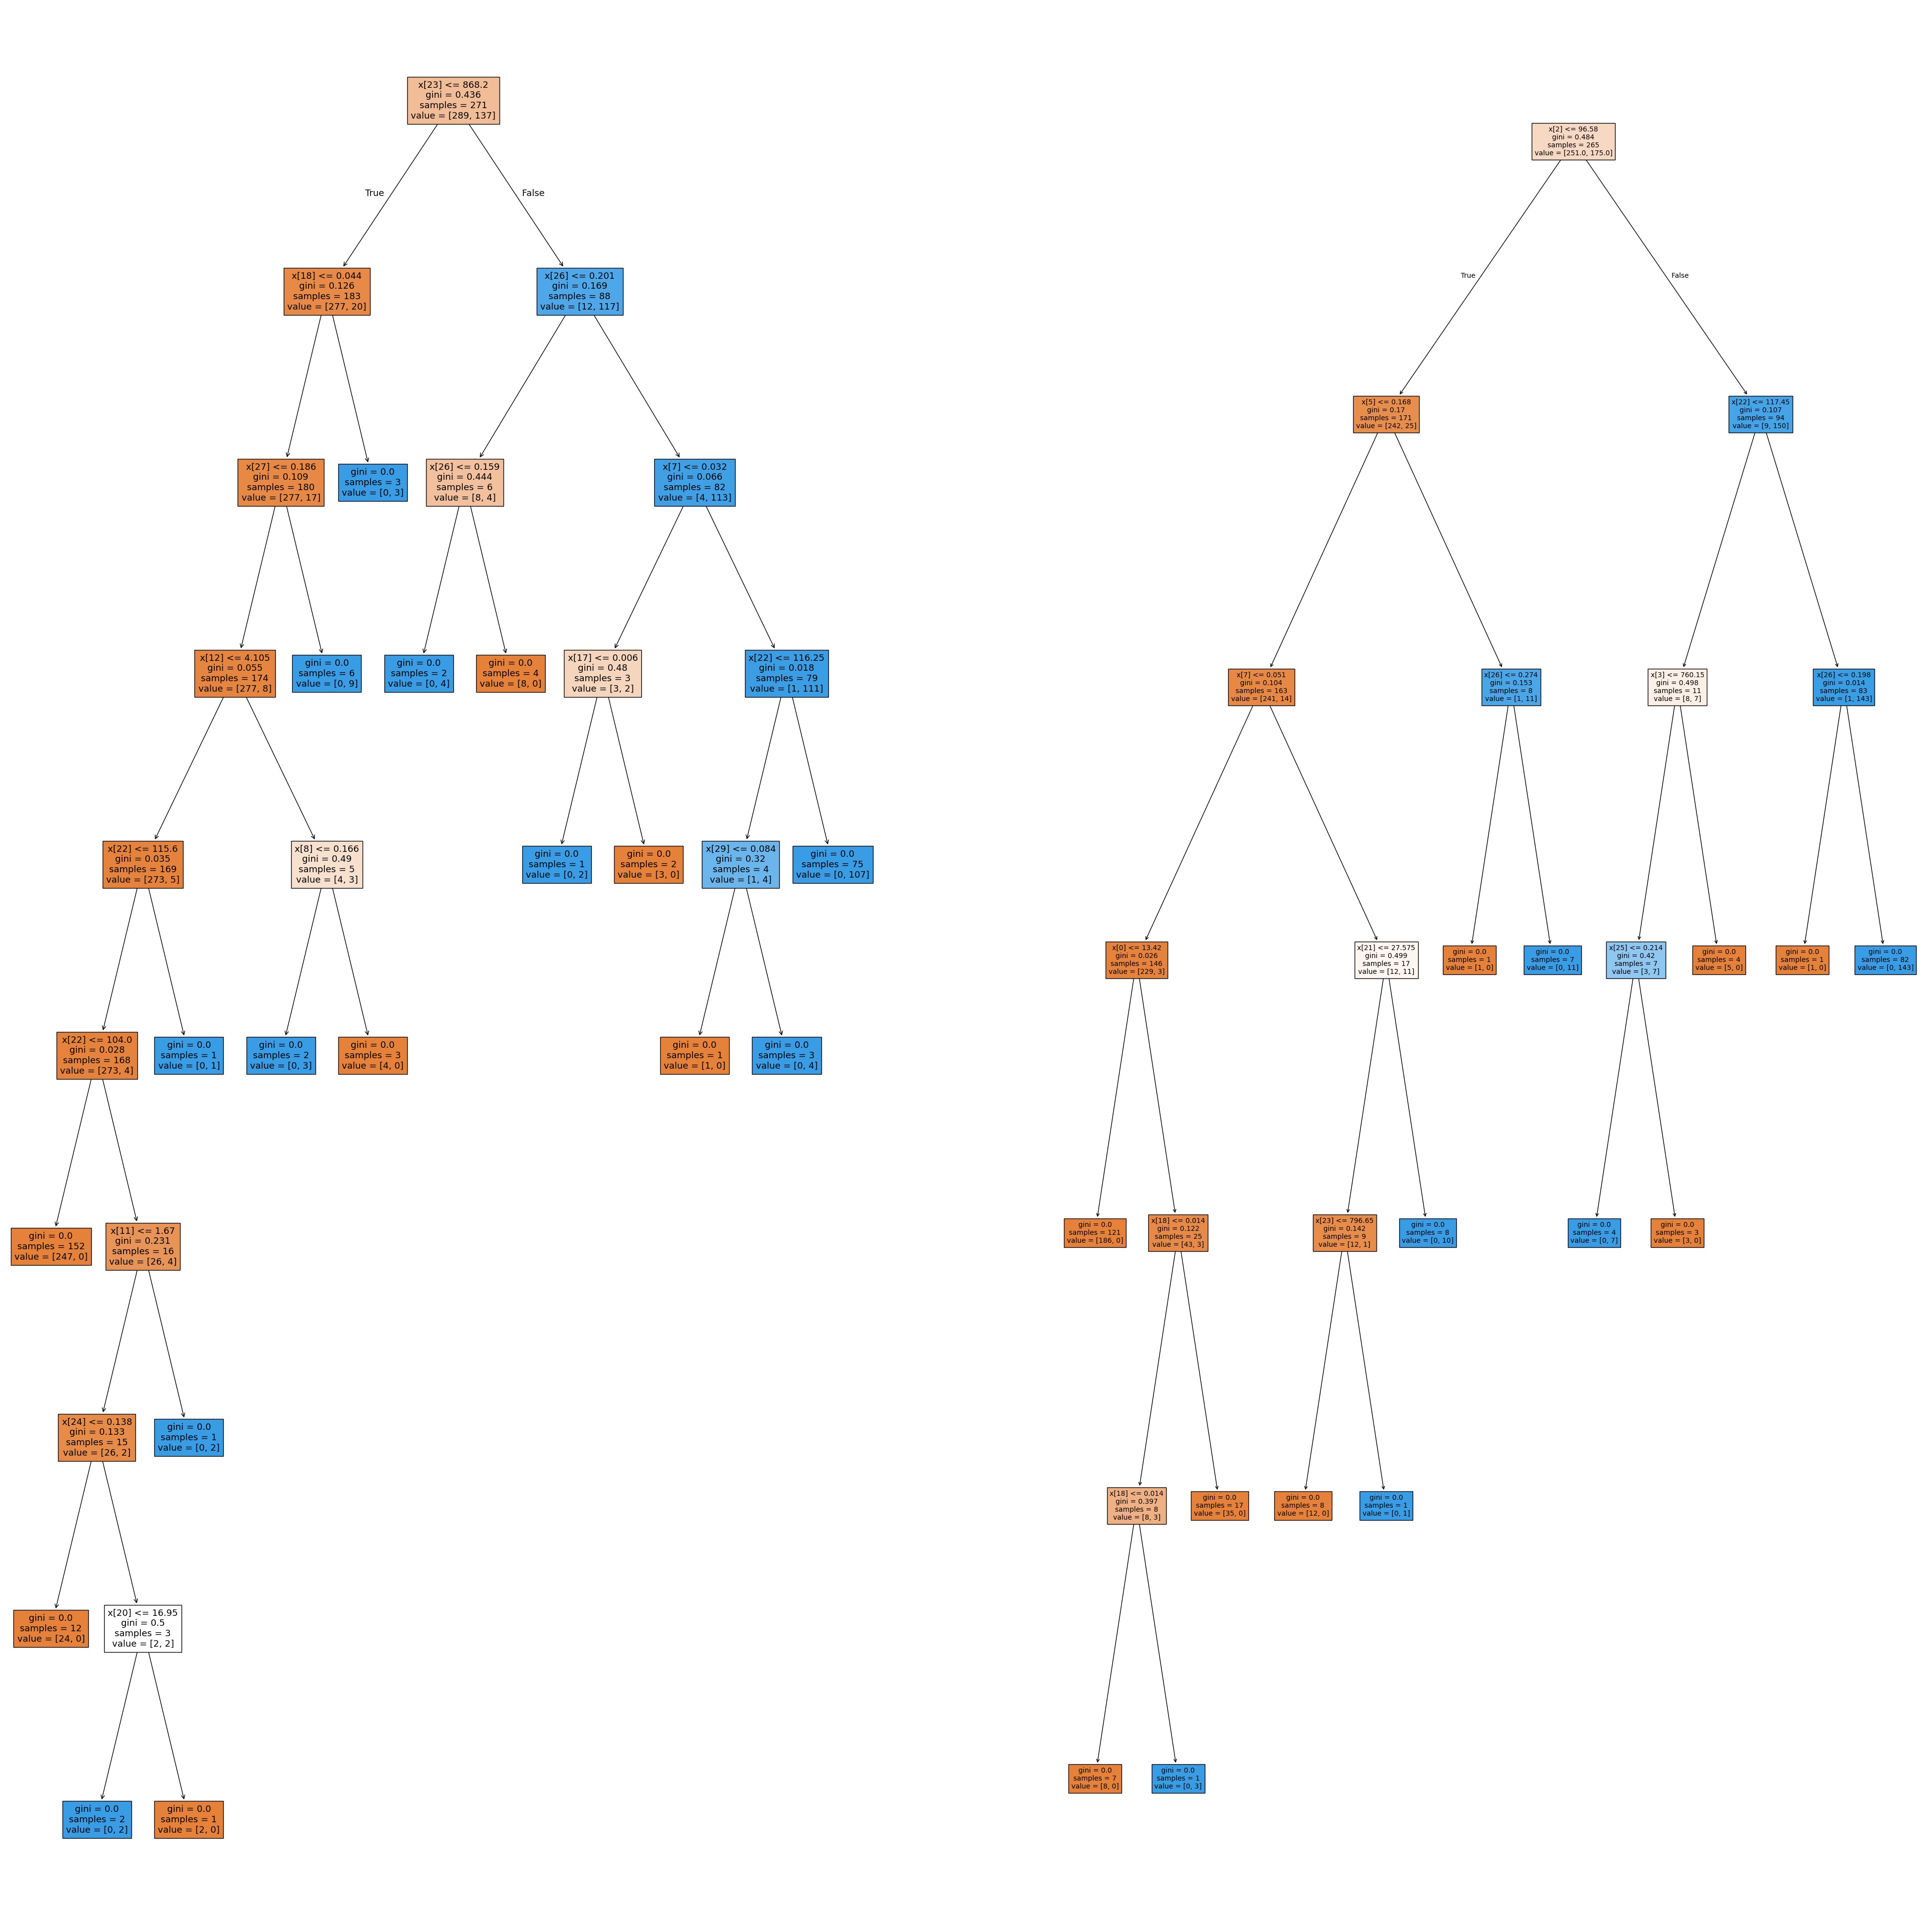

In [211]:
report(rfc, X_test, y_test, "testing")

plt.figure(figsize = (50, 50))

for i in range(1, len(rfc.estimators_) + 1):
    plt.subplot(1, 2, i)
    plot_tree(rfc.estimators_[i-1], filled = True)

In [212]:
rfc = RandomForestClassifier(n_estimators = 100, random_state = 123)
rfc.fit(X_train, y_train) 

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [213]:
report(rfc, X_train, y_train)
report(rfc, X_test, y_test, "testing")

Classification report for model RandomForestClassifier on training data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       267
           1       1.00      1.00      1.00       159

    accuracy                           1.00       426
   macro avg       1.00      1.00      1.00       426
weighted avg       1.00      1.00      1.00       426

Confusion matrix for model RandomForestClassifier on training data
     B    M
B  267    0
M    0  159
----------------------------------------------------------------------------------------------------
Classification report for model RandomForestClassifier on testing data
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        90
           1       1.00      0.92      0.96        53

    accuracy                           0.97       143
   macro avg       0.98      0.96      0.97       143
weighted avg       0.97      0.97      0.97       143


In [214]:
# za poredjenje modela koristimo ROC krivu

from sklearn.metrics import roc_auc_score, roc_curve

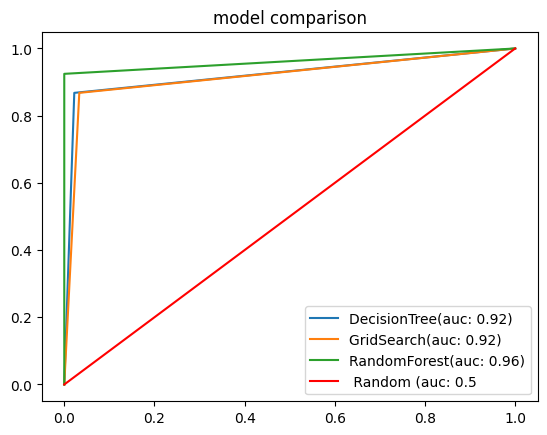

In [215]:
models = [dtc, estimator.best_estimator_, rfc]
models_names = ['DecisionTree', 'GridSearch', 'RandomForest']

# plt.figure(figsize = (15, 15))

for model, model_name in zip(models, models_names):
    y_pred = model.predict(X_test)
    fpr, trp, _ = roc_curve(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    plt.plot(fpr, trp, label = model_name + "(auc: " + str(round(auc, 2)) + ")")

plt.plot([0, 1], [0, 1], label = " Random (auc: 0.5", color = "red")

plt.title("model comparison")
plt.legend()
plt.show()

In [216]:
import pickle

In [217]:
with open('DecisionTree.pkl', 'wb') as f:
    pickle.dump(dtc, f)

In [218]:
with open('DecisionTree.pkl', 'rb') as f:
    loaded_model = pickle.load(f)


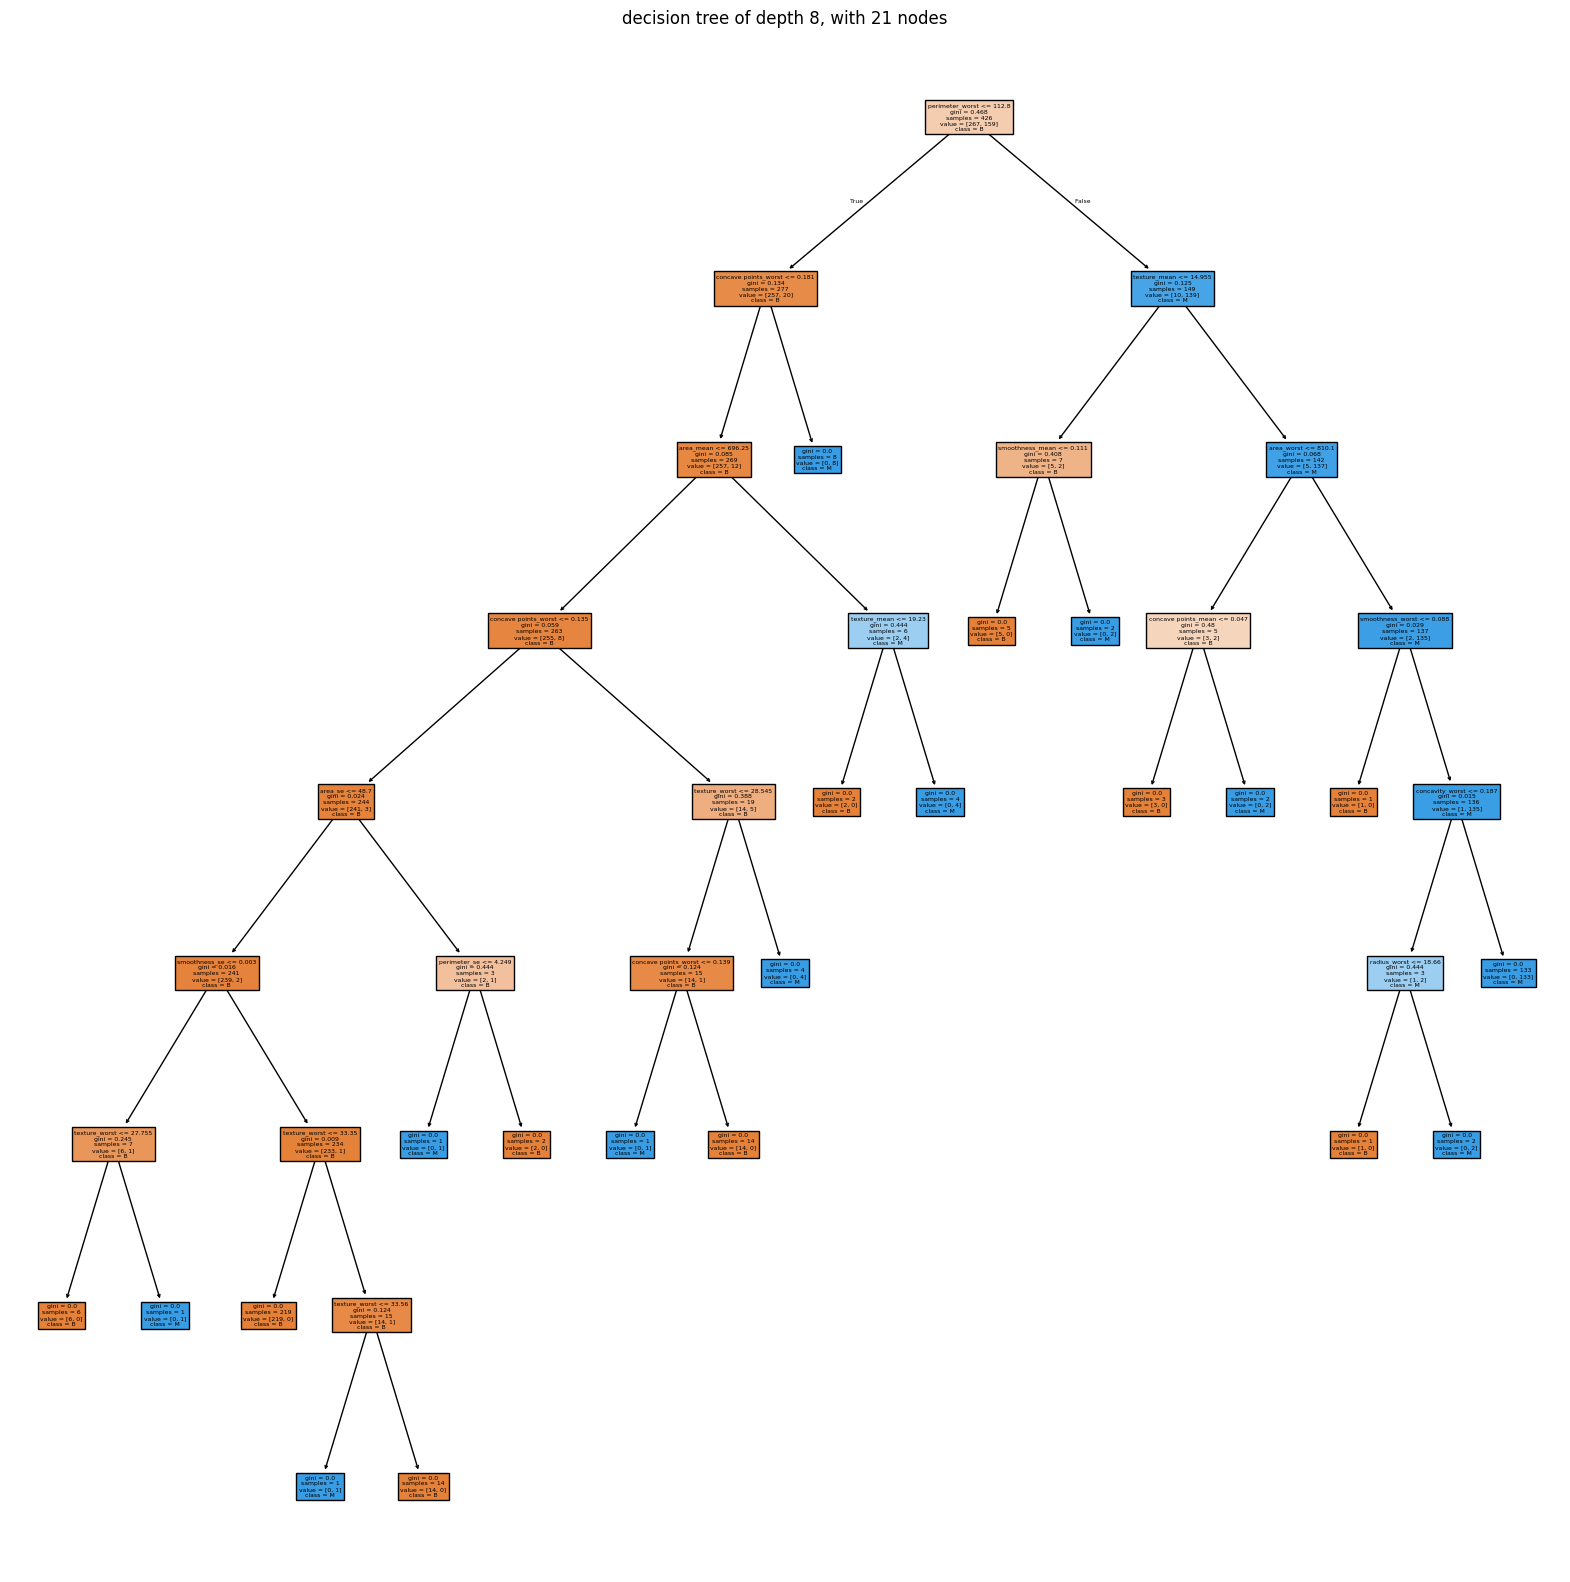

Parametars of model DecisionTreeClassifier:
ccp_alpha 0.0
class_weight None
criterion gini
max_depth None
max_features None
max_leaf_nodes None
min_impurity_decrease 0.0
min_samples_leaf 1
min_samples_split 2
min_weight_fraction_leaf 0.0
monotonic_cst None
random_state None
splitter best
----------------------------------------------------------------------------------------------------


In [219]:
plot_decision_tree(loaded_model, feature_names)